
# ggplot2 Tutorial

## Introduction
In this tutorial, we'll explore the `ggplot2` package, one of the most powerful and flexible tools for data visualization in R. 
Additionally, we'll introduce two useful packages: `patchwork` for combining multiple plots and `ggrepel` for improving the readability of text labels.

### What is `ggplot2`?
`ggplot2` is an R package developed by Hadley Wickham that implements the principles of the Grammar of Graphics. It allows users to create complex and multi-layered graphics by adding layers of graphical objects.

### What You Will Learn
- The Grammar of Graphics: Understanding the fundamental concepts
- Basic plots with `ggplot2`
- Customizing plots: Themes, scales, and color strategies
- Combining plots with `patchwork`
- Enhancing text labels with `ggrepel`
    


## 1. Understanding the Grammar of Graphics

The Grammar of Graphics is a framework for creating graphics that breaks down a graphic into a set of independent components:

- **Data**: The dataset used for the plot
- **Aesthetics (aes)**: Mappings between data and visual properties (e.g., x, y, color)
- **Geometries (geoms)**: The geometric objects that represent the data (e.g., points, lines)
- **Statistics (stats)**: The statistical transformations applied to the data
- **Scales**: The mapping from data to aesthetic space
- **Facets**: The plot's division into subplots
- **Themes**: The visual style of the plot

Let's start by loading the `ggplot2` package and exploring some built-in datasets.
    

In [1]:
# Load necessary packages
library(dplyr)
library(ggplot2)
library(ggrepel)
library(patchwork)

# Load a built-in dataset
data("iris")
head(iris)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [2]:
# Set a custom theme, to increase readability of plots
custom_ggplot_theme <- theme_bw() + theme(
    axis.text = element_text(size = 13),
    axis.title = element_text(size = 15),
    legend.text = element_text(size = 13),
    legend.title = element_text(size = 15),
    strip.text = element_text(size = 15)
)


## 2. Creating Basic Plots with `ggplot2`

### 2.1 Scatter Plot

Let's create a basic scatter plot to visualize the relationship between sepal length and petal length.
    

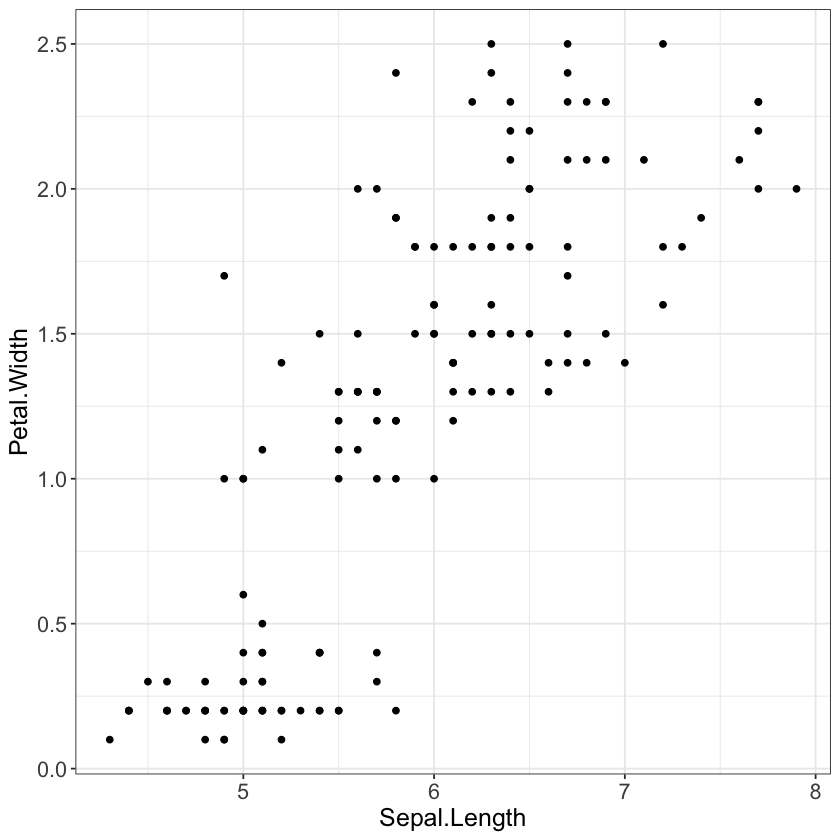

In [3]:
# Scatter plot of engine displacement vs highway miles per gallon
(
  ggplot(data = iris, aes(x = Sepal.Length, y = Petal.Width))
  + geom_point()
  + custom_ggplot_theme
)

### 2.2 Adding Aesthetics

We can add more information by mapping additional variables to aesthetics such as color, size, or shape.
    

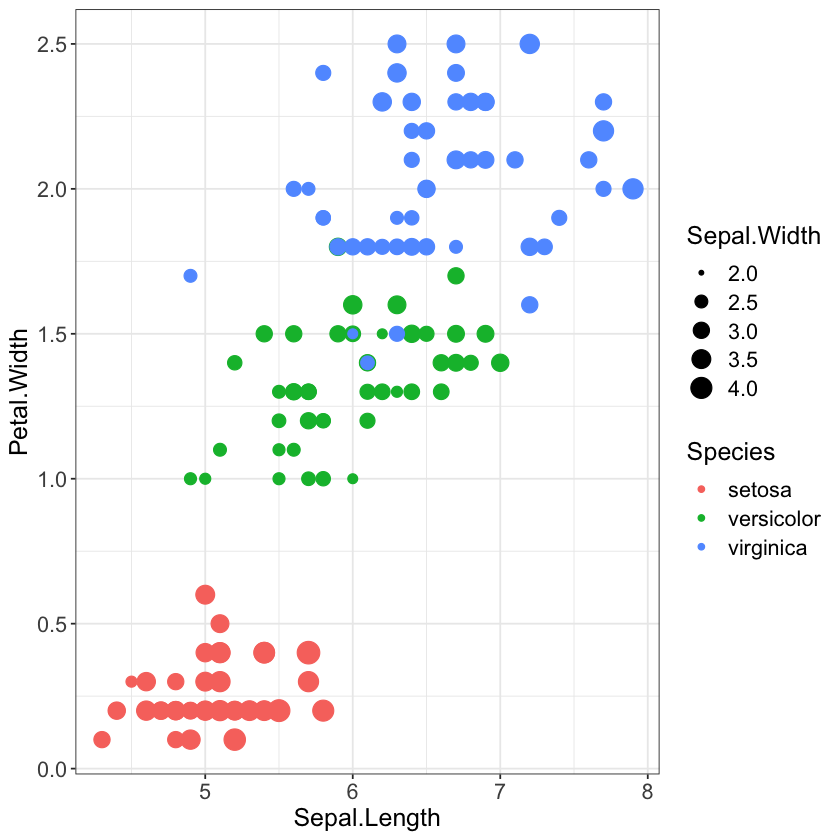

In [4]:
# Scatter plot with color mapped to species
(
  ggplot(
    data = iris,
    aes(
      x = Sepal.Length,
      y = Petal.Width,
      color = Species,
      size = Sepal.Width
      )
    )
  + geom_point()
  + custom_ggplot_theme
)

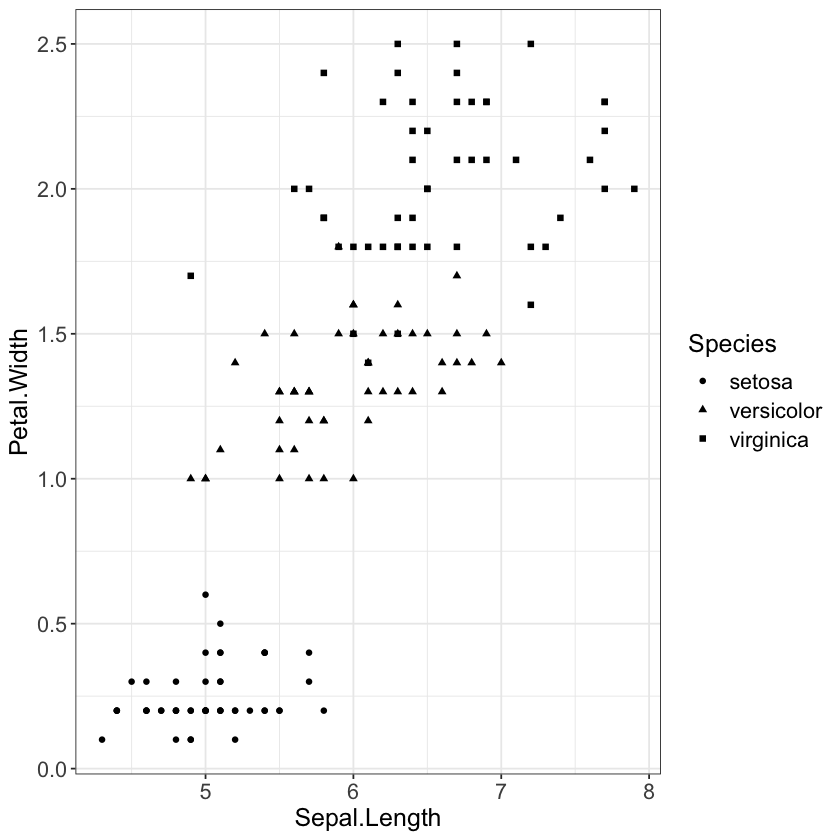

In [5]:
# Certain decisions for mapping variables to visual elements are less effective
# Take, for example, mapping species to a shape, or size, instead
# Scatter plot with color mapped to species
(
  ggplot(
    data = iris,
    aes(
      x = Sepal.Length,
      y = Petal.Width,
      shape = Species
      )
    )
  + geom_point()
  + custom_ggplot_theme
)

Warning message:
“Using size for a discrete variable is not advised.”


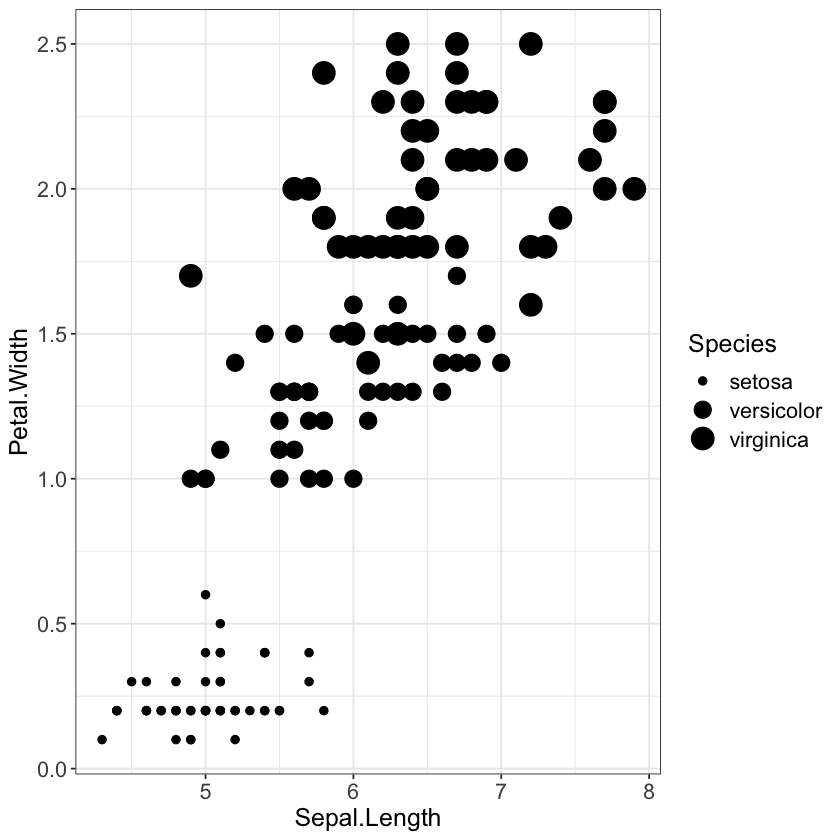

In [6]:
(
  ggplot(
    data = iris,
    aes(
      x = Sepal.Length,
      y = Petal.Width,
      size = Species
      )
    )
  + geom_point()
  + custom_ggplot_theme
)

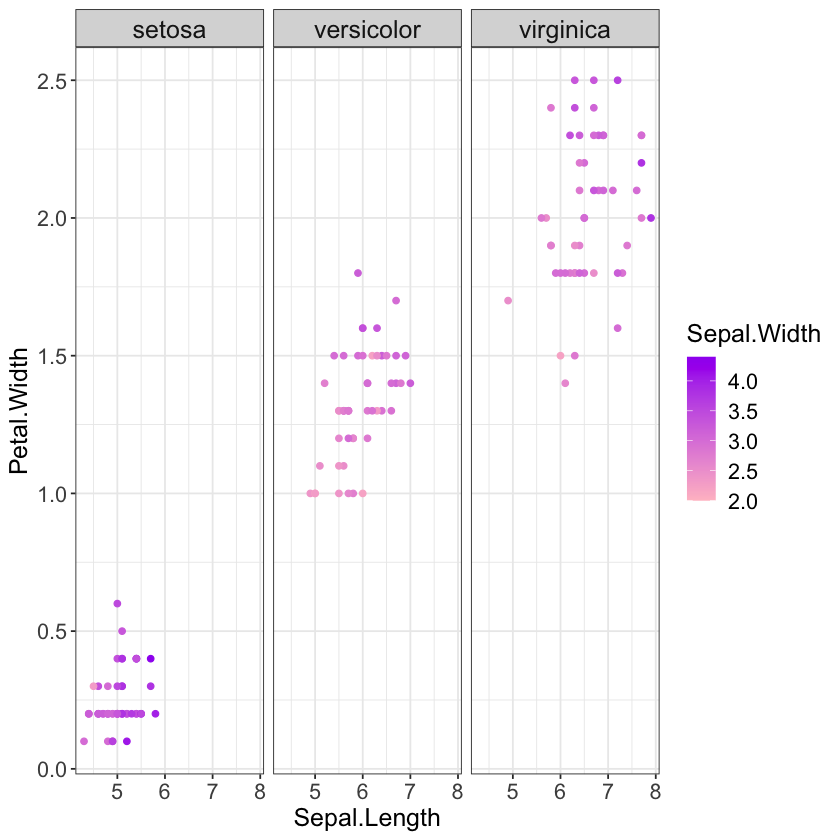

In [7]:
# You can also use facets to add a layer of complexity without trading off understanding.
(
  ggplot(
    data = iris,
    aes(
      x = Sepal.Length,
      y = Petal.Width,
      color = Sepal.Width
      )
    )
  + geom_point()
  + facet_grid("~Species")
  + scale_color_gradient(low = "pink", high = "purple")
  + custom_ggplot_theme
)


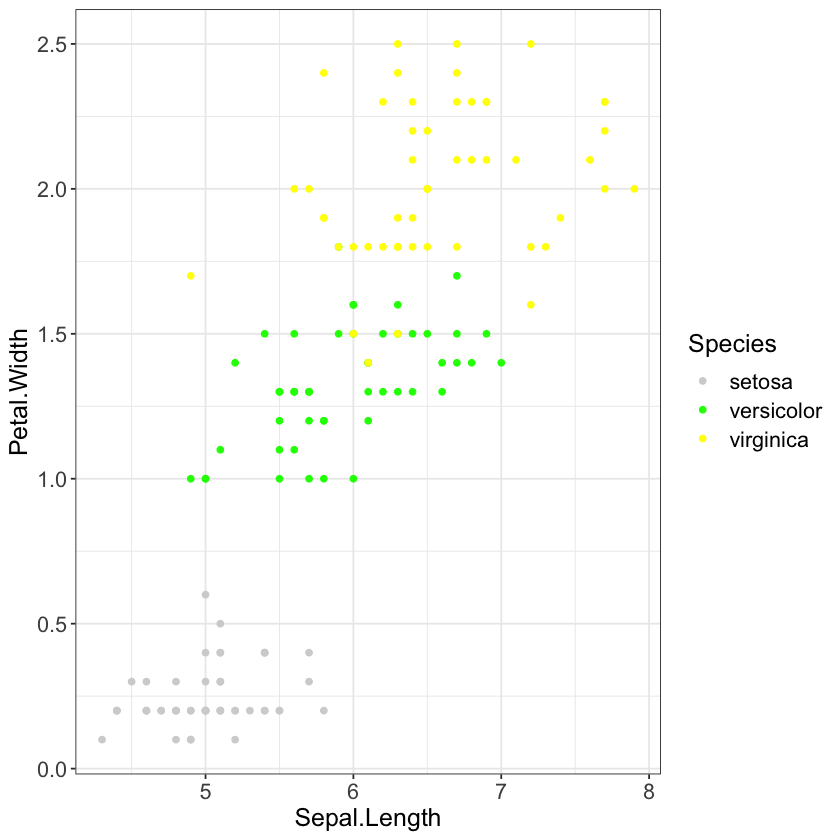

In [8]:
# Choosing different colors impacts interpretability of the data
(
    ggplot(
        data = iris,
        aes(
            x = Sepal.Length,
            y = Petal.Width,
            color = Species
            )
        )
    + geom_point()
    + scale_color_manual(
        values = c(
            "setosa" = "lightgrey",
            "versicolor" = "green",
            "virginica" = "yellow"
            )
        )
    + custom_ggplot_theme
)


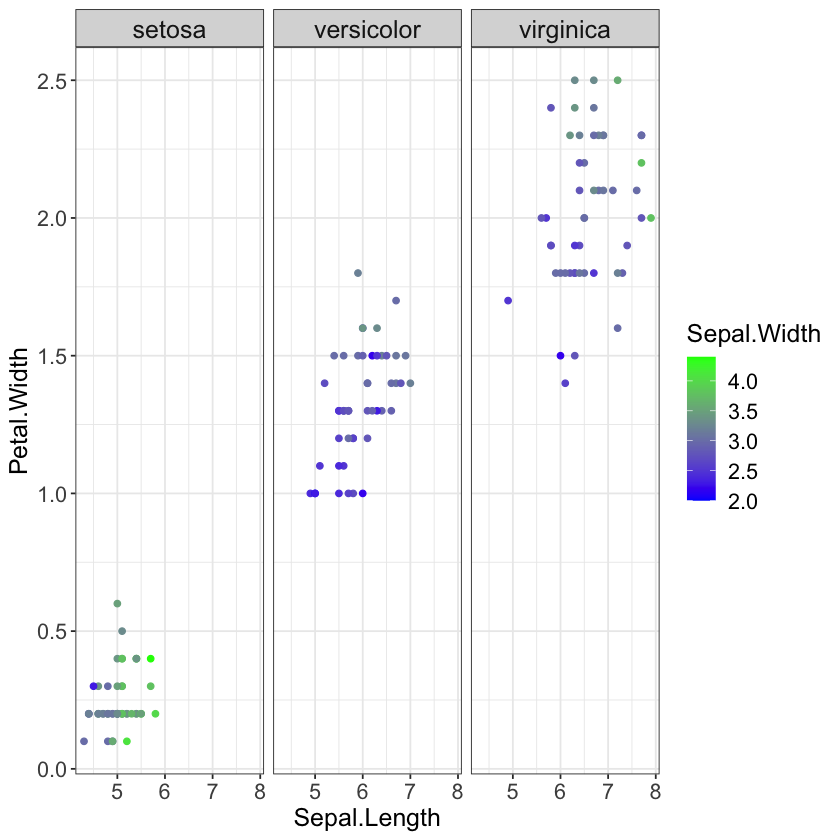

In [9]:
# An example of a plot with a bad color palette
(
  ggplot(
    data = iris,
    aes(
      x = Sepal.Length,
      y = Petal.Width,
      color = Sepal.Width
      )
    )
  + geom_point()
  + facet_grid("~Species")
  + scale_color_continuous(high = "green", low = "blue")
  + custom_ggplot_theme
)


### 2.3 Geometries: Different Plot Types

`ggplot2` supports various geometries (`geoms`). Let's explore some common ones:

- **geom_point()** for scatter plots
- **geom_boxplot()** for box plots
- **geom_line()** for line plots
- **geom_bar()** for bar charts
- **geom_histogram()** for histograms
    

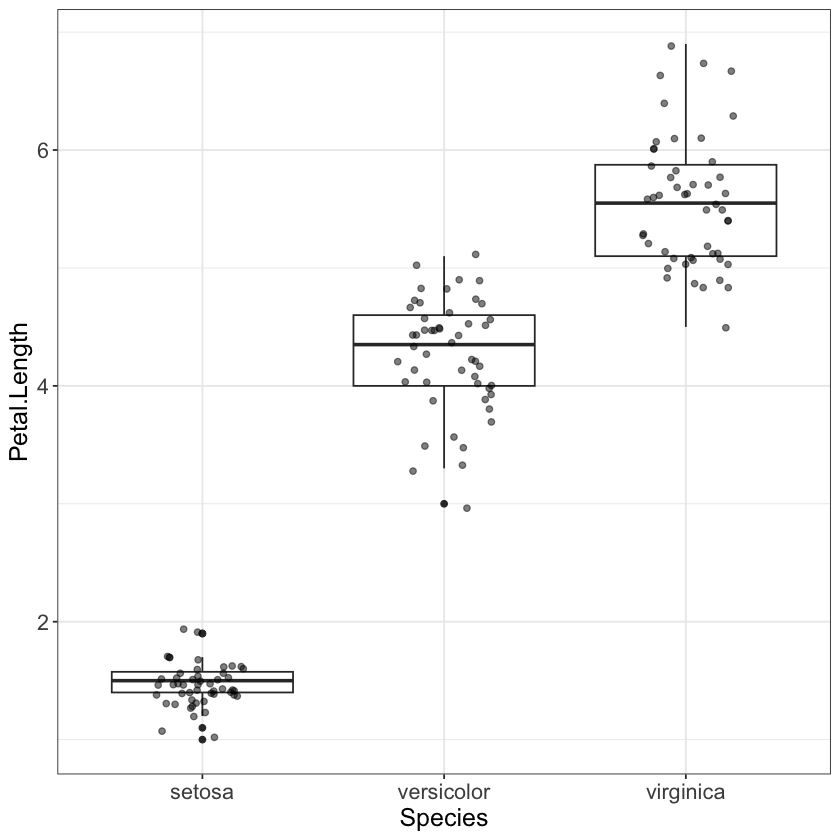

In [10]:
# Box plot example
box_plot_example <- (
  ggplot(
    data = iris,
    aes(
      x = Species,
      y = Petal.Length
      )
    )
   + geom_boxplot()
   + geom_point(position = position_jitter(width = 0.2), alpha = 0.5)
   + custom_ggplot_theme
)

box_plot_example
    


## 3. Customizing plots

### 3.1 Themes and scales

`ggplot2` offers extensive customization options. Themes control the overall appearance of the plot, while scales manage how data values are mapped to aesthetic properties.
    

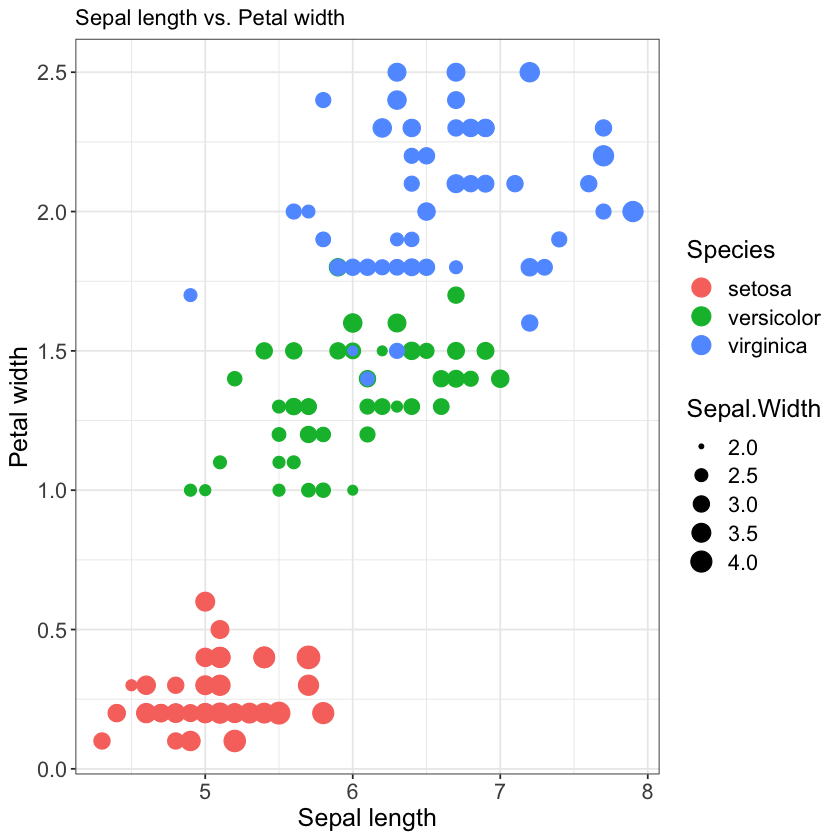

In [11]:
# Customizing the theme
(
  ggplot(
    data = iris,
    aes(
      x = Sepal.Length,
      y = Petal.Width,
      color = Species,
      size = Sepal.Width
      )
    )
  + geom_point()
  + theme_minimal()
  + labs(
    title = "Sepal length vs. Petal width",
    x = "Sepal length",
    y = "Petal width"
    )
  + custom_ggplot_theme
  + guides(color = guide_legend(override.aes = list(size = 5), order = 1))
)
    

### 3.2 Color strategies

We can customize the color palettes using built-in scales or external packages like `RColorBrewer`.

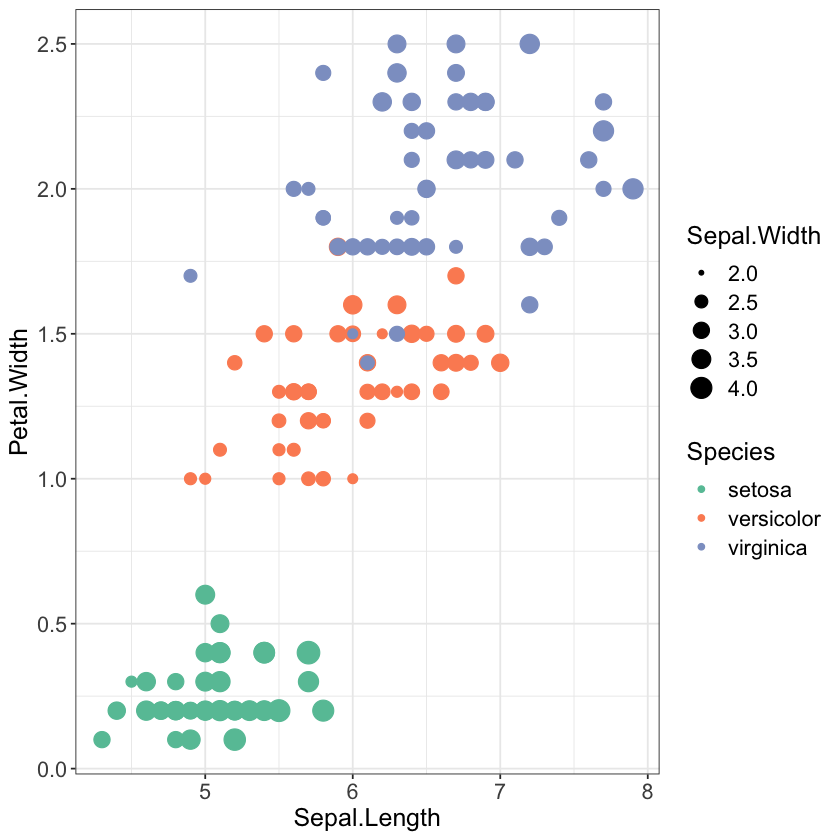

In [12]:
# Custom color scale
custom_color_gg <- (
  ggplot(
    data = iris,
    aes(
      x = Sepal.Length,
      y = Petal.Width,
      color = Species,
      size = Sepal.Width
      )
    )
  + geom_point()
  + scale_color_brewer(palette = "Set2")
  + custom_ggplot_theme
)

custom_color_gg


## 4. Combining plots with `patchwork`

The `patchwork` package makes it easy to combine multiple `ggplot2` plots into a single plot layout.

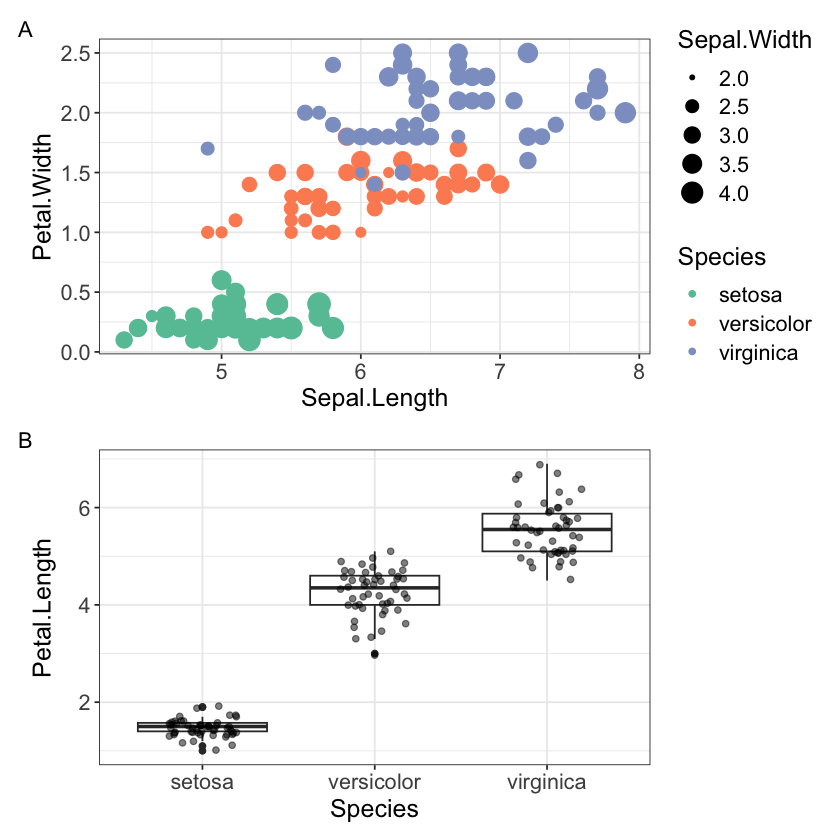

In [13]:
# We previously saved two figures, combine them here into one figure with patchwork
custom_color_gg + box_plot_example + plot_layout(ncol = 1) + plot_annotation(tag_levels = "A")

## 5. Enhancing text labels with `ggrepel`

`ggrepel` helps prevent text labels from overlapping, improving plot readability.
    

In [14]:
# Load a built-in dataset for ggrepel example
data("mpg")

# Add a column with the full car name and remove duplicates
mpg <- mpg %>%
  dplyr::mutate(full_car_name = paste(year, manufacturer, model, sep = " ")) %>%
  dplyr::distinct(full_car_name, .keep_all = TRUE)

head(mpg)
    

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,full_car_name
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,1999 audi a4
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,2008 audi a4
audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact,1999 audi a4 quattro
audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact,2008 audi a4 quattro
audi,a6 quattro,2.8,1999,6,auto(l5),4,15,24,p,midsize,1999 audi a6 quattro
audi,a6 quattro,3.1,2008,6,auto(s6),4,17,25,p,midsize,2008 audi a6 quattro


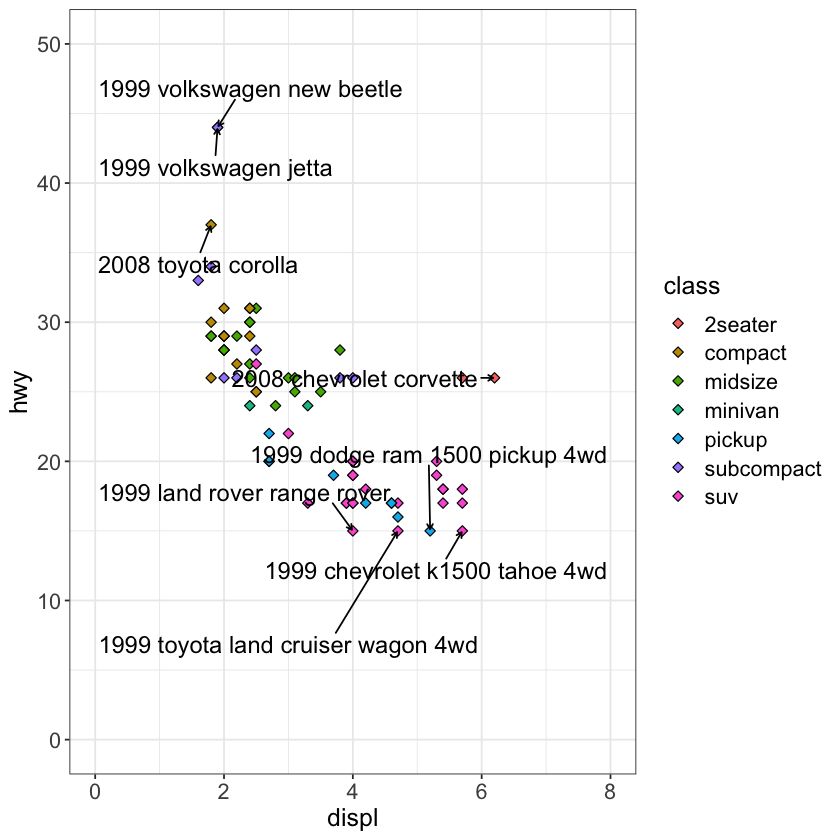

In [15]:
# Subset the data for focused labeling
subset_mpg_for_focused_labels <- mpg %>%
    dplyr::filter(
        hwy > 35 |
        hwy < 16 |
        displ > 6.1
    )

# Scatter plot with text labels for a different dataset
(
    ggplot(
        data = mpg,
        aes(
            x = displ,
            y = hwy
            )
        )
    + geom_point(
        aes(fill = class),
        shape = 23,
        size = 2
        )
    + geom_text_repel(
        data = subset_mpg_for_focused_labels,
        aes(label = full_car_name),
        arrow = arrow(length = unit(0.01, "npc")),
        box.padding = 1.2,
        force = 2,
        size = 5
        )
    + custom_ggplot_theme
    + scale_color_brewer(palette = "Set2")
    + ylim(0, 50)
    + xlim(0, 8)
)


## Conclusion

This tutorial has introduced you to the fundamental concepts of the Grammar of Graphics and how to use `ggplot2` for data visualization in R. We've covered how to customize plots, use different color strategies, and enhance plot layouts and labels with `patchwork` and `ggrepel`.

Explore the vast capabilities of `ggplot2` to create compelling visual stories with your data!
    